In [1]:
#%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

---
#### P1a: Pointwise image transformations

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2023<br>
</p>
</div>

---
In this notebook, we will implement pointwise image transformations to improve the quality of an image.

In [10]:
fn = './imgs/boarddark.jpg'

### 1. Read in the file and convert the data type
Read in the file from above in the variable `img`, do _not_ change the color format with this command. Then, change the data type from `uint8` (the pixel values are bytes in 0.255) to `float` (with values between 0..1).

In [11]:
img = cv2.imread(fn).astype(float) / 255.0

### 2. Investigate the image
Print the shape of the image `img` as well as the minimum and maximum values. Also display the image.

_Remark_: Even though the image is an image with three color channels, it looks like a gray-scaled image since all three channels contain identical values.

In [4]:
print(img.shape, img.max(), img.min())

(480, 640, 3) 0.3764705882352941 0.0


### 3. Improve the image manually
The image `img` is very dark. Use a pointwise transformation to improve the image and store the result in `img_mod`. _You do not need to program any loops, just use matrix operations_, try out:
- multiplication with a constant: `img * const`
- taking to the power: `img ** const`
- adding a constant: `img + const`
Clipping is done automatically (you will see it if you play with the operations from above). Plot the result.

_Remark_: A warning is issued if you exceed the limits of the pixel values. If you want to explicitly clip and avoid the warning use `np.clip(img, lower_val, upper_val)`.


In [13]:
const = 2
img_mod = np.clip((img * const), 0, 1)
img_mod = np.clip((img + const), 0, 1)
img_mod = np.clip((img ** const), 0, 1)

### 4. Adjust the brightness automatically
Think up a method to adjust the brightness without having to choose parameters. Plot the result.

In [14]:
def auto_brightness(img):
    img = img.copy()
    v_max = img.max()
    v_min = img.min()
    img = (img - v_min) / (v_max - v_min)
    return img

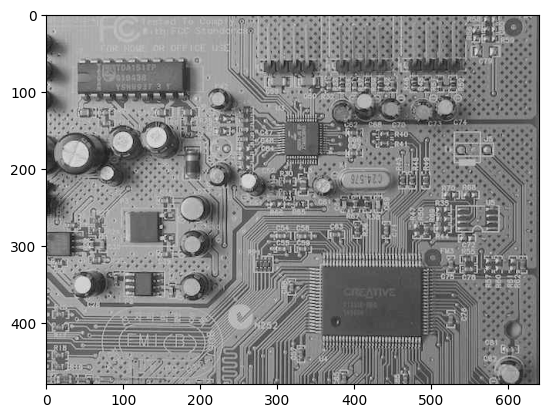

In [15]:
bimg = auto_brightness(img)
plt.imshow(bimg)